In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import csv

%matplotlib inline

In [3]:
location = "C:/Users/workspace/brad_public_workspace_on_win/SH_tongliang/data/数据库/CTA_strats/pairs_trading/"

In [7]:
jm_df = pd.read_csv(location + "jm000(日线).csv", engine="python", header=None)
hc_df = pd.read_csv(location + "hc000(日线).csv", engine="python", header=None)
i_df = pd.read_csv(location + "i9888(日线).csv", engine="python", header=None)
j_df = pd.read_csv(location + "j9888(日线).csv", engine="python", header=None)
oi_df = pd.read_csv(location + "OI000(日线).csv", engine="python", header=None)
p_df = pd.read_csv(location + "p9888(日线).csv", engine="python", header=None)
rb_df = pd.read_csv(location + "rb000(日线).csv", engine="python", header=None)
y_df = pd.read_csv(location + "y9888(日线).csv", engine="python", header=None)

In [10]:
def return_close(df):
    df.columns = ['time', 'open', 'high', 'low', 'close', 'vol', 'holding']
    df.index = df['time']
    close = df['close']
    return close

In [78]:
jm_close = pd.DataFrame(return_close(jm_df))
hc_close = pd.DataFrame(return_close(hc_df))
i_close = pd.DataFrame(return_close(i_df))
j_close = pd.DataFrame(return_close(j_df))
oi_close = pd.DataFrame(return_close(oi_df))
p_close = pd.DataFrame(return_close(p_df))
rb_close = pd.DataFrame(return_close(rb_df))
y_close = pd.DataFrame(return_close(y_df))

In [79]:
jm_close.index = pd.to_datetime(jm_close.index)
hc_close.index = pd.to_datetime(hc_close.index)
i_close.index = pd.to_datetime(i_close.index)
j_close.index = pd.to_datetime(j_close.index)
oi_close.index = pd.to_datetime(oi_close.index)
p_close.index = pd.to_datetime(p_close.index)
rb_close.index = pd.to_datetime(rb_close.index)
y_close.index = pd.to_datetime(y_close.index)

In [80]:
jm_close.reset_index(inplace = True)
hc_close.reset_index(inplace = True)
i_close.reset_index(inplace = True)
j_close.reset_index(inplace = True)
oi_close.reset_index(inplace = True)
p_close.reset_index(inplace = True)
rb_close.reset_index(inplace = True)
y_close.reset_index(inplace = True)

In [81]:
def merge_multiple(x, y):
    merged = x.merge(y, on = 'time', how = 'inner')
    return merged

In [82]:
merged = merge_multiple(jm_close, hc_close)

In [83]:
merged_all = merge_multiple(merged, i_close)
merged_all = merge_multiple(merged_all, j_close)
merged_all = merge_multiple(merged_all, oi_close)
merged_all = merge_multiple(merged_all, p_close)
merged_all = merge_multiple(merged_all, rb_close)
merged_all = merge_multiple(merged_all, y_close)

In [85]:
merged_all.head()

,time,close_x,close_y,close_x,close_y,close_x,close_y,close_x,close_y
0,2014-03-24,796.0,3332,744.0,1183.0,6972,6160,3214,6872
1,2014-03-25,825.0,3380,759.0,1216.0,6984,6126,3287,6866
2,2014-03-26,825.0,3378,758.0,1204.0,7026,6196,3273,6922
3,2014-03-27,820.0,3364,757.0,1202.0,7038,6224,3268,6950
4,2014-03-28,840.0,3384,781.0,1223.0,7040,6182,3304,6926


In [87]:
merged_all.columns = ['time', 'jm', 'hc', 'i', 'j', 'oi', 'p', 'rb', 'y']

In [89]:
pair1 = ['jm', 'j']
pair2 = ['hc', 'rb', 'i']
pair3 = ['y', 'p', 'oi']

# Pair Part 1

In [92]:
pair_jm_j = merged_all['jm'].corr(merged_all['j'])

In [93]:
pair_jm_j

0.9646202767925516

In [112]:
merged_all['jm'].pct_change().corr(merged_all['j'].pct_change())

0.7922564456648906

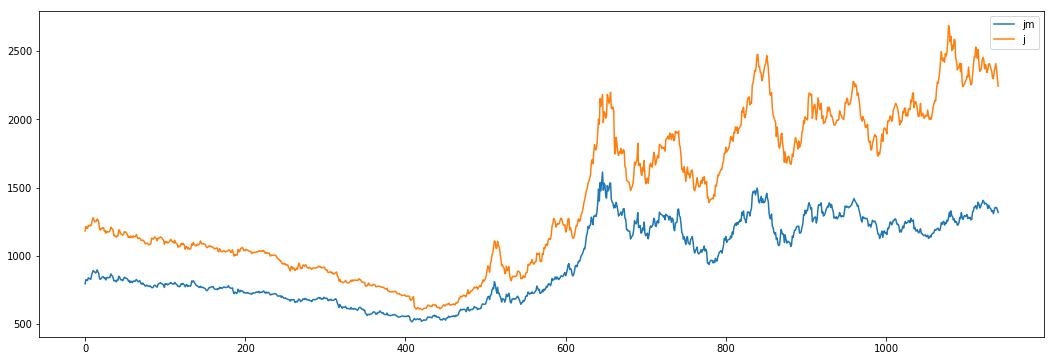

In [107]:
merged_all[['jm', 'j']].plot(figsize = (18, 6))

# Pair Part 2

## Pair 2.1

In [96]:
pair_hc_rb = merged_all['hc'].corr(merged_all['rb'])

In [110]:
merged_all['hc'].pct_change().corr(merged_all['rb'].pct_change())

0.9311083780925553

In [97]:
pair_hc_rb

0.9837398907337336

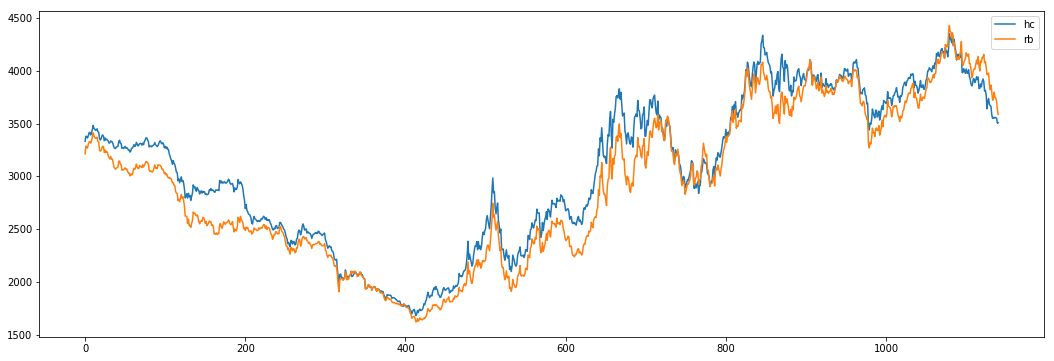

In [108]:
merged_all[['hc', 'rb']].plot(figsize = (18, 6))

In [ ]:
import seaborn as sns
corr = dataframe.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

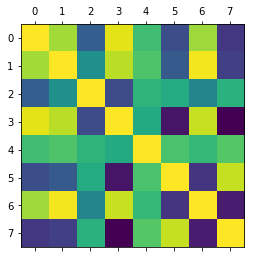

In [114]:
(merged_all.corr())

## Pair 2.2

In [98]:
pair_hc_i = merged_all['hc'].corr(merged_all['i'])

In [99]:
pair_hc_i

0.5842738745270256

## Pair 2.3

In [100]:
pair_i_rb = merged_all['i'].corr(merged_all['rb'])
pair_i_rb

0.5441126654565

# Pair Part 3

In [101]:
pair3 = ['y', 'p', 'oi']

In [102]:
pair_y_p = merged_all['y'].corr(merged_all['p'])
pair_y_p

0.9259328921770019

In [111]:
merged_all['y'].pct_change().corr(merged_all['p'].pct_change())

0.7948008062165121

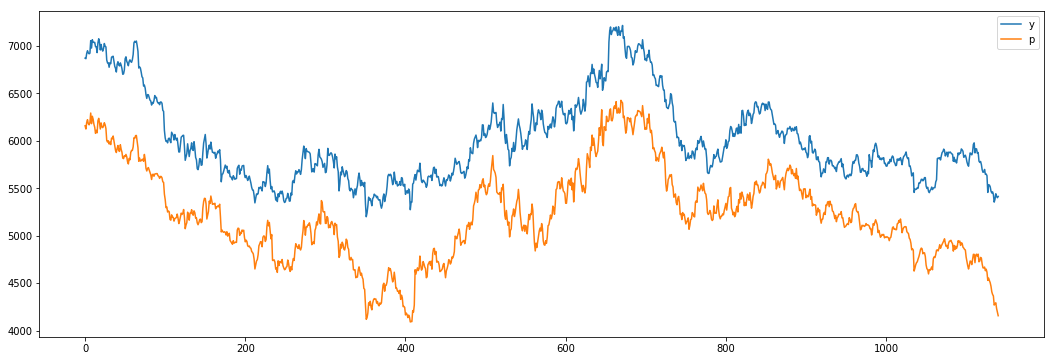

In [109]:
merged_all[['y', 'p']].plot(figsize = (18, 6))

In [103]:
pair_y_oi = merged_all['y'].corr(merged_all['oi'])
pair_y_oi

0.7790969779097968

In [104]:
pair_p_oi = merged_all['p'].corr(merged_all['oi'])
pair_p_oi

0.7590788493937118